In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time
import plotly.express as px

In [2]:
data = pd.read_csv('../dataset/old.csv', sep=',')
data

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,1,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,1,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,1048576,69632,0,528,1,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,1,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,1,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,0,0,0,16,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,1048576,4096,0,16,0,89008,94904,102400,0,0


In [3]:
data.groupby(data['Malware']).size()

Malware
0     5012
1    14599
dtype: int64

In [4]:
data = pd.read_csv('../dataset/old.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
XX = data.drop(['Name','Malware','TimeDateStamp','ImageDirectoryEntryExport', 'ImageDirectoryEntryImport',
	       'ImageDirectoryEntryResource', 'ImageDirectoryEntryException',
	       'ImageDirectoryEntrySecurity'], axis=1)
yy = data['Malware']
X_trainn, X_testt, y_trainn, y_testt= train_test_split(XX,yy, test_size=0.2, random_state=101)
X_trainn.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
11441,23117,144,3,0,4,0,65535,0,184,0,...,519381,528384,2,33088,524288,69632,1048576,4096,0,16
2624,23117,144,3,0,4,0,65535,0,184,0,...,132461,135168,2,0,1048576,4096,1048576,4096,0,16
18874,23117,144,3,0,4,0,65535,0,184,0,...,235770,258048,2,320,262144,4096,1048576,4096,0,16
16415,23117,144,3,0,4,0,65535,0,184,0,...,117248729,618496,2,34112,1048576,4096,1048576,4096,0,16
11179,23117,144,3,0,4,0,65535,0,184,0,...,2018594456,737280,2,33088,1048576,4096,1048576,4096,0,16


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(XX.dtypes)

e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
e_cparhdr                        int64
e_minalloc                       int64
e_maxalloc                       int64
e_ss                             int64
e_sp                             int64
e_csum                           int64
e_ip                             int64
e_cs                             int64
e_lfarlc                         int64
e_ovno                           int64
e_oemid                          int64
e_oeminfo                        int64
e_lfanew                         int64
Machine                          int64
NumberOfSections                 int64
PointerToSymbolTable             int64
NumberOfSymbols                  int64
SizeOfOptionalHeader             int64
Characteristics                  int64
Magic                            int64
MajorLinkerVersion               int64
MinorLinkerVersion       

In [6]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trainn)
X_new = pd.DataFrame(X_scaled, columns=XX.columns)
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,-0.231964,-0.030482,-0.349626,0.915324,-0.397598,1.231926,-0.01792,-0.032034,-0.023774,-0.008716
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,-0.232748,-0.041795,-0.349626,-1.100996,-0.017011,-0.063494,-0.01792,-0.032034,-0.023774,-0.008716
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,-0.232539,-0.038260,-0.349626,-1.081495,-0.587891,-0.063494,-0.01792,-0.032034,-0.023774,-0.008716
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.004331,-0.027890,-0.349626,0.977725,-0.017011,-0.063494,-0.01792,-0.032034,-0.023774,-0.008716
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,3.853226,-0.024473,-0.349626,0.915324,-0.017011,-0.063494,-0.01792,-0.032034,-0.023774,-0.008716


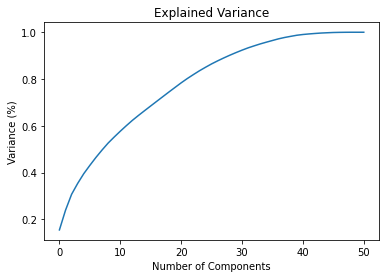

In [7]:
from sklearn.decomposition import PCA

pca = PCA()


principalComponents = pca.fit_transform(X_new)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [8]:
skpca = PCA(n_components=35)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])
print('Shape before PCA: ', X_new.shape)
print('Shape after PCA: ', X_pca.shape)

Variance sum :  0.9575582692926456
Shape before PCA:  (15688, 51)
Shape after PCA:  (15688, 35)


In [9]:
exp_var_cumul = np.cumsum(skpca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"})

In [10]:
pca_df = pd.DataFrame(data = X_pca)
pca_df["Malware"] = data["Malware"]
pca_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,Malware
0,-0.235358,-0.214219,4.314726,0.895634,0.596657,-1.081957,-0.858326,0.236178,-0.705838,0.080304,...,0.028103,0.636239,-0.103640,0.466487,0.003942,0.026638,-0.017992,-0.610942,-0.165008,1
1,-0.162889,-0.098305,-1.289567,-0.477140,-0.182964,0.487041,0.493762,1.236010,2.572384,-0.043606,...,0.031546,0.152001,-0.117268,0.011875,0.093710,-0.093509,0.034984,-0.418228,0.430802,1
2,-0.245171,-0.050226,-0.012242,0.085250,0.201624,-0.336817,0.052818,-0.215904,0.484660,-0.817566,...,0.075130,0.188626,0.211726,0.834587,-0.231845,-0.291659,-0.109406,-0.327145,-0.143060,1
3,-0.241555,-0.151168,-0.878993,-0.132663,-0.007798,0.216699,0.011013,0.300148,-0.774833,-0.401788,...,-0.376158,-0.009354,-0.135448,-0.430677,0.049041,0.236230,0.062210,0.390502,0.100736,1
4,-0.316046,0.095018,-0.681642,0.052885,0.447312,-0.208975,-0.203760,-0.207696,-2.004439,-1.396925,...,0.121929,0.269229,0.240697,0.143457,-0.010666,0.228918,0.079573,-0.028507,-0.355652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,-0.133604,-0.214524,3.750727,0.457066,-0.839321,0.969238,0.530634,0.952389,-0.752238,1.554418,...,0.249504,-1.543039,0.064096,-0.042015,0.299059,-0.556336,-0.318633,-0.232264,-0.720333,0
15684,-0.237581,-0.160909,-0.861183,-0.137307,-0.020667,0.224632,0.019804,0.331974,-0.654159,-0.363192,...,-0.382119,-0.033225,-0.148369,-0.424522,0.045766,0.226114,0.057711,0.402516,0.099343,0
15685,-0.064112,-0.122719,4.600081,0.879351,-0.012927,-0.578321,0.057344,-0.065780,0.851611,0.558353,...,0.169622,0.313432,-0.089102,0.043633,-0.060352,0.198895,0.142644,0.279166,-0.148971,0
15686,-0.200061,-0.070168,0.286155,0.227950,-0.127093,0.050283,0.556925,-0.525607,0.497644,-0.382300,...,0.172173,0.649917,0.017084,0.468474,-0.291977,0.421450,0.232176,-0.140881,-0.083781,0


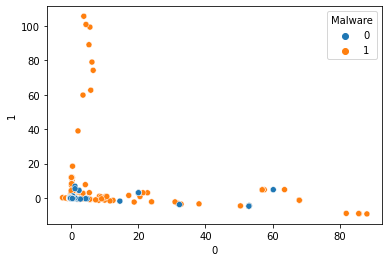

In [11]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
hue = 'Malware',
data=pca_df,
legend=True)
plt.show()

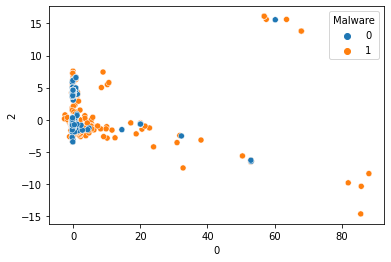

In [12]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[2],
hue = 'Malware',
data=pca_df,
legend=True)
plt.show()

In [13]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(skpca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_pca,
    labels=labels,
    dimensions=range(4),
    color=pca_df["Malware"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [14]:
X_test_scaled = scaler.transform(X_testt)
X_test_new = pd.DataFrame(X_test_scaled, columns=XX.columns)
X_test_pca = skpca.transform(X_test_new)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate, KFold
clf = GradientBoostingClassifier().fit(X_pca, y_trainn)
scoring = ['precision', 'recall', 'accuracy','f1']
kf = KFold(n_splits=10)
scores = cross_validate(clf, X_test_pca, y_testt, scoring=scoring ,return_train_score=True, cv=kf)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_recall',
 'train_accuracy',
 'train_f1',
 'train_precision',
 'train_recall']

In [16]:
print('Hasil CROSS VALIDATION DENGAN K 10 PADA TEST')
print('Scores setiap 10k-fold test accuracy: ', scores['test_accuracy'], 'Scores rata rata test accuracy  : ', np.mean(scores['test_accuracy']))
print()
print('Scores setiap 10k-fold test precision: ', scores['test_precision'],'Scores rata rata test precision  : ', np.mean(scores['test_precision']))
print()
print('Scores setiap 10k-fold test recall: ', scores['test_recall'],'Scores rata rata test recall  : ', np.mean(scores['test_recall']))
print()
print('Scores setiap 10k-fold test f1-score: ', scores['test_f1'],'Scores rata rata test f1-score  : ', np.mean(scores['test_f1']))
print()
print()
print('Hasil Cross Validation dengan k10 pada Train')
print('Scores setiap 10k-fold train accuracy: ', scores['train_accuracy'],'Scores rata rata train accuracy : ', np.mean(scores['train_accuracy']))
print()
print('Scores setiap 10k-fold train precision: ', scores['train_precision'],'Scores rata rata train precision : ', np.mean(scores['train_precision']))
print()
print('Scores setiap 10k-fold train recall: ', scores['train_recall'],'Scores rata rata train recall : ', np.mean(scores['train_recall']))
print()
print('Scores setiap 10k-fold train f1-score: ', scores['train_f1'],'Scores rata rata train f1-score : ', np.mean(scores['train_f1']))

Hasil CROSS VALIDATION DENGAN K 10 PADA TEST
Scores setiap 10k-fold test accuracy:  [0.97455471 0.97455471 0.97709924 0.9744898  0.96683673 0.98214286
 0.98979592 0.96938776 0.97704082 0.96173469] Scores rata rata test accuracy  :  0.9747637222828063

Scores setiap 10k-fold test precision:  [0.98214286 0.98101266 0.97402597 0.97359736 0.96381579 0.98006645
 0.98996656 0.98287671 0.97909408 0.97260274] Scores rata rata test precision  :  0.9779201167682855

Scores setiap 10k-fold test recall:  [0.98214286 0.98726115 0.99667774 0.99326599 0.99322034 0.99662162
 0.996633   0.97619048 0.98943662 0.97594502] Scores rata rata test recall  :  0.9887394808098039

Scores setiap 10k-fold test f1-score:  [0.98214286 0.98412698 0.98522167 0.98333333 0.97829716 0.98827471
 0.99328859 0.97952218 0.98423818 0.97427101] Scores rata rata test f1-score  :  0.9832716683829459


Hasil Cross Validation dengan k10 pada Train
Scores setiap 10k-fold train accuracy:  [0.99036827 0.99348442 0.99121813 0.9912206

In [17]:
clf = GradientBoostingClassifier().fit(X_pca, y_trainn)

Text(33.0, 0.5, 'True labels')

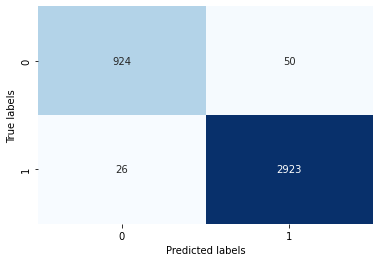

In [18]:
y_pred=clf.predict(X_test_pca)
ax = sns.heatmap(confusion_matrix(y_testt, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(0.5, 1.0, 'Features Yang digunakan')

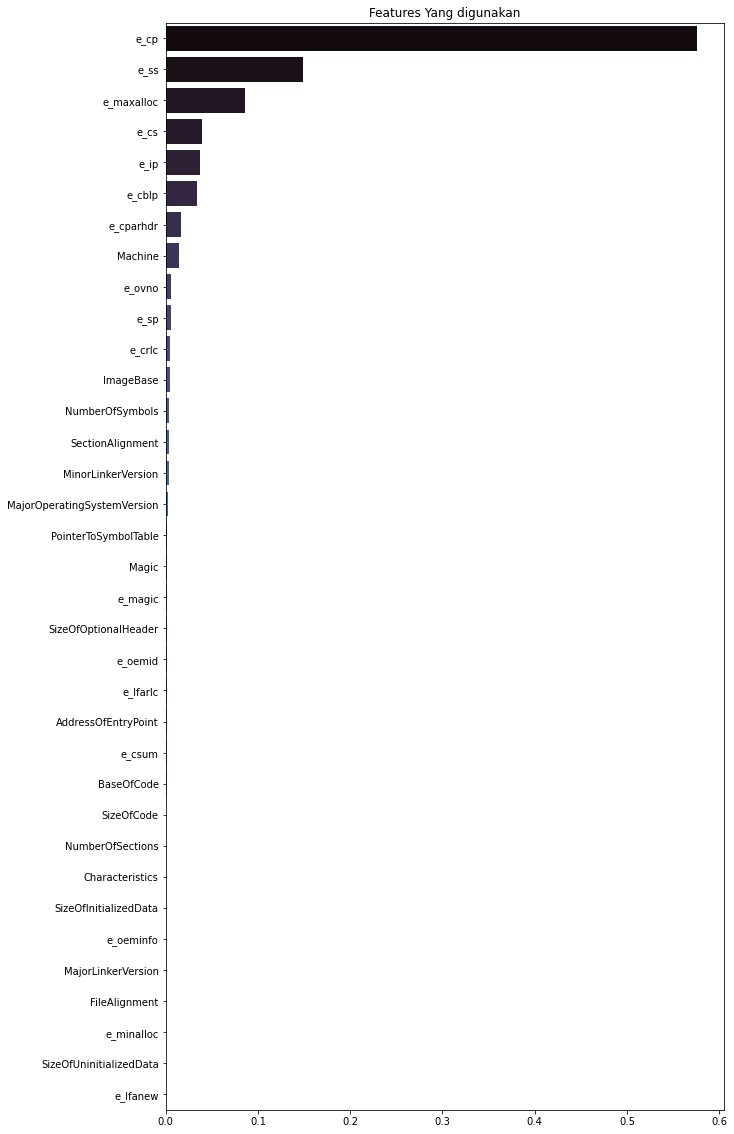

In [19]:
importance = clf.feature_importances_
importance_dict = {XX.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features Yang digunakan')

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
cm2 = confusion_matrix(y_testt, y_pred)
print(cm2)

TN = cm2[0][0] * 100
FN = cm2[1][0] * 100
TP = cm2[1][1] * 100
FP = cm2[0][1] * 100

DR = TP / (TP+FN)
FAR = FP / (FP+TN)
print("Detection Rate:", DR)
print("False Alarm Rate", FAR)
print("Accuracy", accuracy_score(y_testt, y_pred))
print("Precision", precision_score(y_testt, y_pred))
print("Recall", recall_score(y_testt, y_pred))
print("F1-Score", f1_score(y_testt, y_pred))

[[ 924   50]
 [  26 2923]]
Detection Rate: 0.9911834520176331
False Alarm Rate 0.0513347022587269
Accuracy 0.9806270711190416
Precision 0.9831819710729902
Recall 0.9911834520176331
F1-Score 0.9871664978047956


In [21]:
import joblib
import pickle
import pipes
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('scale', scaler),('pca', skpca), ('clf', model)])
#joblib.dumps(pipe, 'my_model.pkl')
pkl_filename = "../components/boostingscalerTP.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(scaler, file)
pkl_filename = "../components/boostingpcaTP.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(skpca, file)
pkl_filename = "../components/boostingrf_modelTP.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

In [22]:
import aiofiles
import jinja2
from colabcode import ColabCode
import pefile
from fastapi import FastAPI
import multipart
from sklearn.pipeline import Pipeline
import pandas as pd
import os
import math
import numpy as np
from io import BytesIO
from keras.applications import imagenet_utils
import tensorflow as tf 
import itertools
import pefile
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import uvicorn
from fastapi import FastAPI, File, UploadFile
from starlette.responses import RedirectResponse
import cv2
import tempfile
import uvicorn
from tensorflow.keras.utils import img_to_array
from fastapi.templating import Jinja2Templates
from PIL import Image

In [23]:
cc = ColabCode(port=12000, code=False)
import joblib
import itertools

In [24]:
def createDataframeFromPEdump(pe):

	dosHeaders = ['e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
	       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
	       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew']
	fileHeaders=['Machine',
	       'NumberOfSections','PointerToSymbolTable',
	       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics']
	optionalHeaders=['Magic',
	       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
	       'SizeOfInitializedData', 'SizeOfUninitializedData','AddressOfEntryPoint', 'BaseOfCode',
	        'ImageBase', 'SectionAlignment','FileAlignment', 'MajorOperatingSystemVersion',
	       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
	       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
	       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
	       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
	       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes']


	dheaders = {}
	fheaders = {}
	oheaders={}
	imd1 = {}

	for x in dosHeaders:
		dheaders[x] = getattr(pe.DOS_HEADER,x)
	df = pd.DataFrame(dheaders,index=[0])

	for i in fileHeaders:
		fheaders[i] = getattr(pe.FILE_HEADER,i)
	df = pd.concat([df,(pd.DataFrame(fheaders,index=[0]))],axis=1)

	for y in optionalHeaders:
		oheaders[y] = getattr(pe.OPTIONAL_HEADER,y)
	df = pd.concat([df,(pd.DataFrame(oheaders,index=[0]))],axis=1)

	df = pd.concat([df,(pd.DataFrame(imd1,index=[0]))],axis=1)

	return df

def getPredictions(df):
    load_scaler = joblib.load(open(r'../components/boostingscalerTP.pkl','rb'))
    load_skpca = joblib.load(open(r'../components/boostingpcaTP.pkl','rb'))
    load_model = joblib.load(open(r'../components/boostingrf_modelTP.pkl','rb'))
    pipe = Pipeline([('scale', load_scaler),('pca', load_skpca),('rf_model', load_model)])
    df = np.array(df)
    df = df.reshape(1,-1)
    results = pipe.predict_proba(df)
    pred = pipe.predict(df)
    return (results[0],pred[0])

In [25]:
#creating fastApi app 
from fileinput import filename


app_desc = """<h2> Try uploading a Portable Executable(PE) file"""
app = FastAPI(description = app_desc)
templates = Jinja2Templates(directory="html")
@app.get("/",include_in_schema=False)
async def index():
	return RedirectResponse(url="/docs")

@app.post("/predict")
def parse(file: UploadFile = File(...)):
    extension = os.path.splitext(file.filename)[1]
    _, path = tempfile.mkstemp(prefix='parser_', suffix=extension)

    with open(path, 'ab') as f:
        for chunk in iter(lambda: file.file.read(10000), b''):
            f.write(chunk)

    # extract content
    content = pefile.PE(path,fast_load=True)
    dataframe = createDataframeFromPEdump(content)
    binary_preds = getPredictions(dataframe)
    if binary_preds[1] == 1:
       return {'Name file' : file.filename, 'response':'Malicious file','predictions':binary_preds[0][1]*100}
    else:
      return {'Name file' : file.filename, 'Response': 'Your file is same from malware.','Malicious percentage':binary_preds[0][1]*100}
    #remove temp file
    os.close(_)
    os.remove(path)

In [26]:
cc.run_app(app=app)

t=2023-02-16T17:33:08+0700 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


Public URL: NgrokTunnel: "https://78b7-36-72-207-77.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [2548]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2548]
